In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN

### Задание 1

Загрузим данные и посмотрим на них.

In [2]:
data_all = pd.read_excel("geo.xlsx")

In [3]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   x              108806 non-null  float64
 1   y              108806 non-null  float64
 2   comment_class  108806 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 MB


In [4]:
data_all.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


#### Обязательное задание

Разделим город на районы безотносительно голосов.

In [5]:
data = data_all.drop("comment_class", axis = 1)

km = KMeans(n_clusters = 10)
km.fit(data)

clusters = km.predict(data)

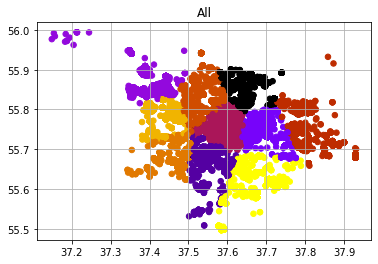

In [6]:
plt.scatter(data.x, data.y, c = clusters, cmap = 'gnuplot', s = 30)
plt.title("All")
plt.grid()
plt.show()

Исследуем скопления голосов за и против отдельно.

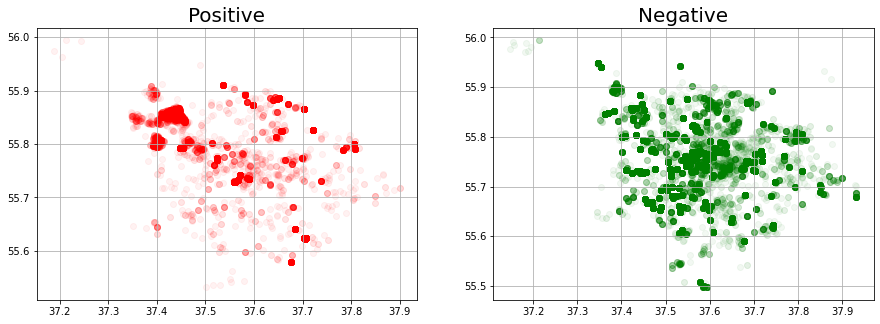

In [7]:
data_pos = data_all[data_all.comment_class == 1]
data_neg = data_all[data_all.comment_class == -1]

fig, (pos, neg) = plt.subplots(1, 2, figsize = (15, 5))

pos.scatter(x = data_pos.x, y = data_pos.y, alpha = 0.05, color = "red")
neg.scatter(x = data_neg.x, y = data_neg.y, alpha = 0.05, color = "green")

pos.set_title("Positive", fontsize = 20)
neg.set_title("Negative", fontsize = 20)

pos.grid()
neg.grid()
plt.show()

Определим оптимальное число кластеров.

In [8]:
inertia = list()
clusters = range(1, 15)

for k in clusters:
    km = KMeans(n_clusters = k)
    km.fit(data)
    inertia.append(km.inertia_ / 100)

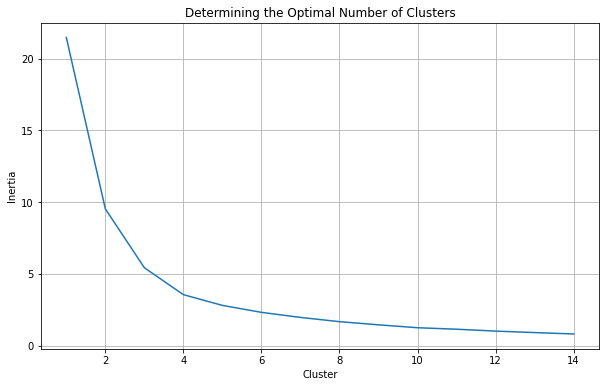

In [9]:
plt.figure(figsize = (10, 6))
plt.plot(clusters, inertia)
plt.title("Determining the Optimal Number of Clusters")
plt.xlabel("Cluster")
plt.ylabel("Inertia")
plt.grid()
plt.show()

Исходя из графика, оптимальное количество кластеров - 3.

#### Дополнительное задание

In [10]:
dbscan = DBSCAN(eps = 0.02, min_samples = 500, n_jobs = -1)
clusters = dbscan.fit_predict(data)

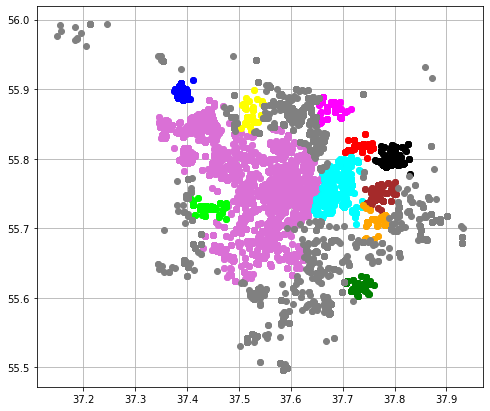

In [11]:
plt.figure(figsize = (8, 7))
for i, color in zip(range(11), {"blue", "red", "green", "black", "orange", "yellow", 
                                "brown", "orchid", "lime", "magenta", "cyan"}):
    x = data.x[clusters == i]
    y = data.y[clusters == i]
    plt.plot(x, y, "ro", c = color)
    plt.plot(x, y, "ro", c = color)
    
x = data.x[clusters == -1]
y = data.y[clusters == -1]
plt.plot(x, y, "ro", c = "grey")

plt.grid()
plt.show()